In [43]:
import numpy as np
from scipy import linalg
import pydot
from IPython.display import Image, display

In [44]:
graph = pydot.Dot("Graph")
with open("input2.txt", 'r') as file:
    lines = file.readlines()
    n_nodes = int(lines[0])
    mask = np.zeros((n_nodes, n_nodes))
    n_edges = int(lines[1])
    for e in lines[2:]:
        src, dst = e.rstrip().split(' ')
        src, dst = int(src), int(dst)
        
        mask[src-1, dst-1] = 1
        graph.add_edge(pydot.Edge(e.split(' ')[0], e.split(' ')[1]))

In [45]:
np.set_printoptions(precision=4)

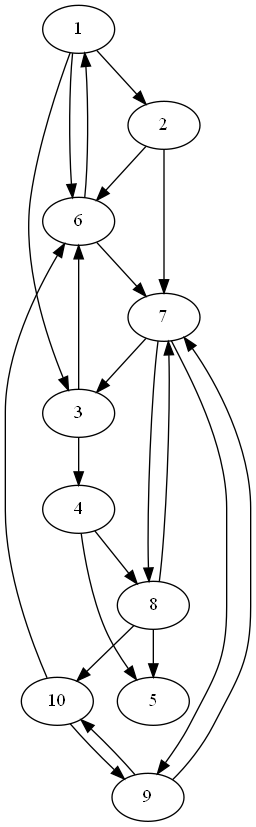

In [46]:
plt = Image(graph.create_png())
display(plt)

In [47]:
mask

array([[0., 1., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0.]])

In [48]:
def compute_trans(mask, random_tp = 0.1):
    
    #Calculating sum of each row and dividing from mask to get probabilities
    sums = np.sum(mask, axis=1, keepdims=True)
    trans = np.divide(mask, sums, out=np.zeros_like(mask), where=sums!=0)
    
    #Accounting for random teleportations
#     temp1 = np.divide(random_tp, (n_nodes - sums), out=np.zeros_like(mask), where=(n_nodes - sums)!=0)
#     temp2 = np.divide(1 - random_tp, sums, out=np.zeros_like(mask), where=sums!=0)
#     trans = temp1 * (1 - mask) + temp2 * mask
#     trans = trans / np.sum(trans, axis=1, keepdims=True)
    
    return trans

In [49]:
trans = compute_trans(mask)
trans

array([[0.    , 0.3333, 0.3333, 0.    , 0.    , 0.3333, 0.    , 0.    ,
        0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
        0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.5   , 0.    , 0.5   , 0.    , 0.    ,
        0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.5   , 0.    , 0.    , 0.5   ,
        0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    ],
       [0.5   , 0.    , 0.    , 0.    , 0.    , 0.    , 0.5   , 0.    ,
        0.    , 0.    ],
       [0.    , 0.    , 0.3333, 0.    , 0.    , 0.    , 0.    , 0.3333,
        0.3333, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.3333, 0.    , 0.3333, 0.    ,
        0.    , 0.3333],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.5   , 0.    ,
        0.    , 0.5   ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.5   , 0.    , 0.    ,
        0.5   , 0.    ]])

In [50]:
np.sum(trans, axis=1, keepdims=True)

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [51]:
def left_eigen(trans):
    _, vl = linalg.eig(trans, left=True, right=False)
    return vl[:, 0] / np.sum(vl[:, 0])

In [52]:
ss = left_eigen(trans)
np.real(ss)

array([0.0809, 0.0288, 0.0992, 0.053 , 0.0634, 0.1514, 0.198 , 0.0987,
       0.1248, 0.1018])

In [53]:
np.sum(ss)

(0.9999999999999999+0j)

In [54]:
def power_iter(transition_matrix, epsilon = 1e-15, max_iters = 10000):
    current_iter = 0
    starting_page = np.random.choice(len(transition_matrix))
    steady_state = np.zeros((1, len(transition_matrix)))
    prev_steady_state =  np.zeros((1, len(transition_matrix)))
    steady_state[0, starting_page] = 1
    print(steady_state)
    while (np.linalg.norm(steady_state - prev_steady_state) > epsilon and current_iter < max_iters):
        prev_steady_state = steady_state
        steady_state = np.matmul(steady_state, transition_matrix)
        current_iter += 1
    
    return steady_state, current_iter

In [55]:
ss, ci = power_iter(trans)
ss, ci

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


(array([[3.2639e-15, 1.1616e-15, 4.0062e-15, 2.1387e-15, 2.5605e-15,
         6.1138e-15, 7.9923e-15, 3.9863e-15, 5.0377e-15, 4.1082e-15]]),
 468)

In [56]:
np.sum(ss)

4.0369238298156303e-14